exp 7 To implement outlier detection using Density-Based method.

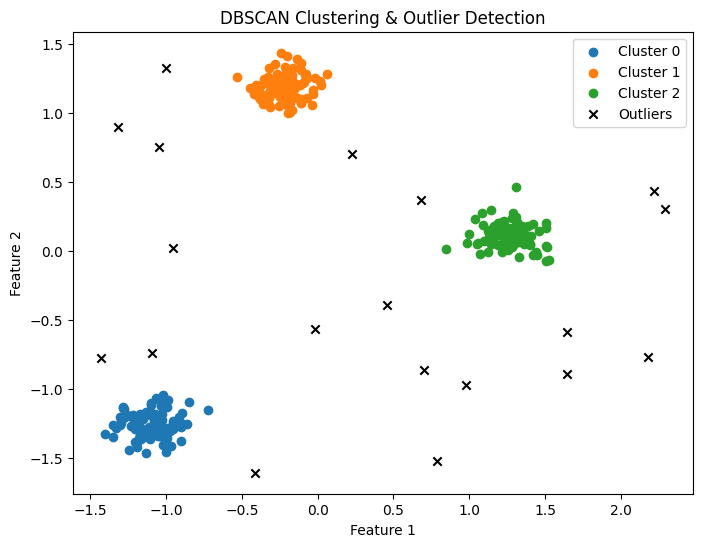

In [4]:
#7 DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with clusters and some noise
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
X = np.vstack([X, np.random.uniform(low=-10, high=10, size=(20, 2))])  # Add noise points

# Standardize features (DBSCAN is sensitive to scale)
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (DBSCAN labels them as -1)
outliers = X[labels == -1]

# Plot results
plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for label in unique_labels:
    if label == -1:
        # Outliers in black
        plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', label='Outliers')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}')

plt.legend()
plt.title("DBSCAN Clustering & Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
